Korrelationen mit S&P 500 Returns:
(375-400)   -0.061427
(400-425)   -0.031936
(425-450)   -0.111426
(450-475)    0.029958
(475-500)    0.116232
(500-525)    0.077429
Name: sp500 Return date to date, dtype: float64
Regressionsergebnisse:
R²: 0.04
Koeffizienten: {'(375-400)': np.float64(-0.3382916990831757), '(400-425)': np.float64(-0.019566428539774833), '(425-450)': np.float64(-0.10492097129498205), '(450-475)': np.float64(-0.1204301750757999), '(475-500)': np.float64(-0.0403049756440605), '(500-525)': np.float64(-0.18279701948138768)}


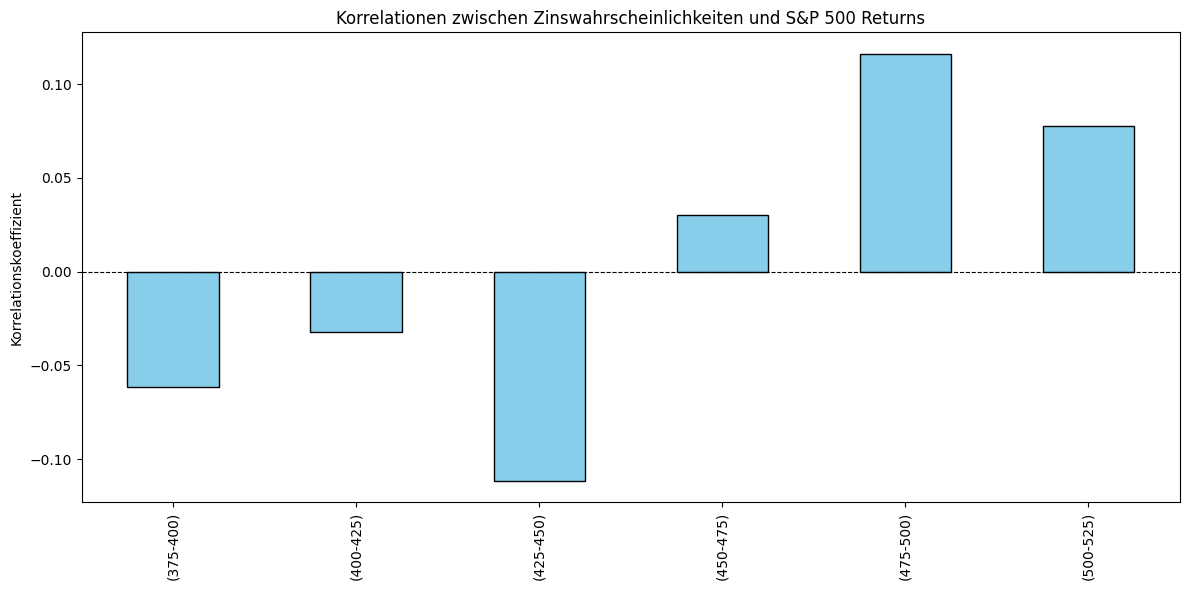

R² (Trainingsdaten): 0.76
R² (Testdaten): -3.48

Feature-Wichtigkeiten:
     Feature  Importance
3  (450-475)    0.356097
0  (375-400)    0.239858
1  (400-425)    0.183034
2  (425-450)    0.142787
4  (475-500)    0.057896
5  (500-525)    0.020328


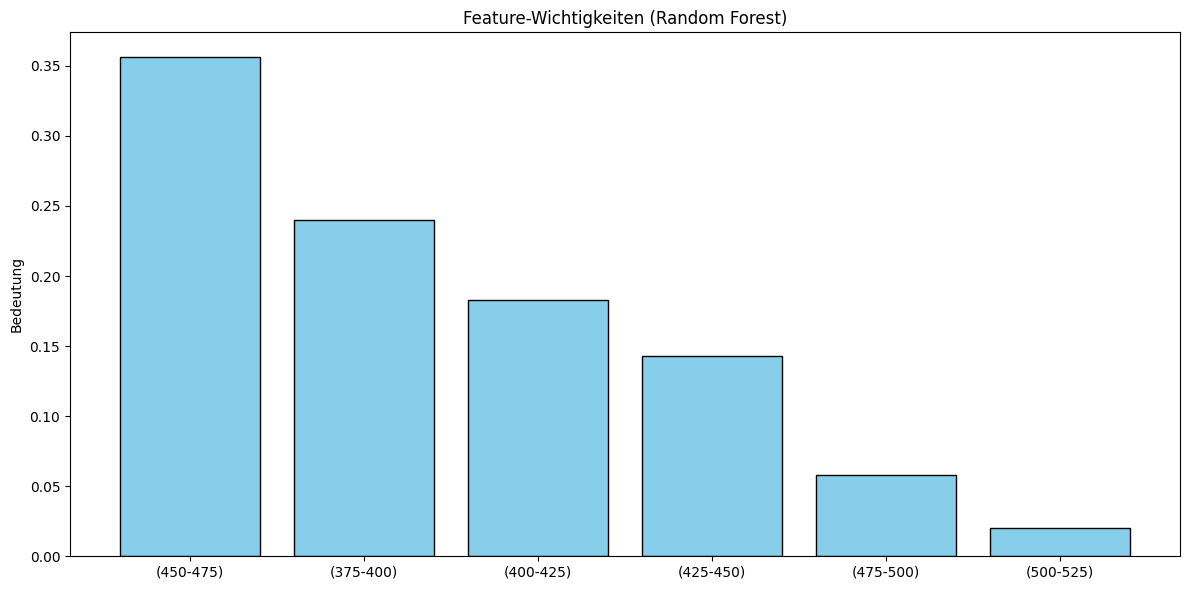

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Daten vorbereiten
data = {
    'Date': [
        '2024-05-31', '2024-06-07', '2024-06-14', '2024-06-21', '2024-06-28',
        '2024-07-05', '2024-07-12', '2024-07-19', '2024-08-30', '2024-09-09',
        '2024-09-16', '2024-09-30', '2024-10-07', '2024-10-16', '2024-10-31',
        '2024-11-07', '2024-11-15', '2024-11-29', '2024-12-06', '2024-12-08', '2024-12-23'
    ],
    '(375-400)': [
        0, 0, 0, 0, 0, 0, 0, 0.074109, 0.034841, 0.102188, 0.20123, 0.143775, 0, 0, 0, 0, 0, 0, 0, 0, None
    ],
    '(400-425)': [
        0.000409, 0.000128, 0, 0, 0, 0.000709, 0.000767, 0.342856, 0.218096, 0.384338,
        0.439646, 0.47383, 0.074225, 0, 0, 0.02414, 0, 0, 0, 0.008985, None
    ],
    '(425-450)': [
        0.012691, 0.007517, 0.017967, 0.016377, 0.015552, 0.046294, 0.082426, 0.445408, 0.447559, 0.392346,
        0.296326, 0.382396, 0.783275, 0.855805, 0.750851, 0.665514, 0.618812, 0.660383, 0.859923, 0.991015, 1
    ],
    '(450-475)': [
        0.110225, 0.107431, 0.207547, 0.191808, 0.272171, 0.573047, 0.649314, 0.137627, 0.299503, 0.121128,
        0.062797, 0, 0.1425, 0.138735, 0.238299, 0.310347, 0.381188, 0.339617, 0.140077, 0, 0
    ],
    '(475-500)': [
        0.337602, 0.354594, 0.443142, 0.432164, 0.460839, 0.343913, 0.264129, 0, 0, 0,
        0, 0, 0, 0.00546, 0.010851, 0, 0, 0, 0, 0, 0
    ],
    '(500-525)': [
        0.390626, 0.395223, 0.280588, 0.298876, 0.219602, 0.036037, 0.003364, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    ],
    'sp500 Return date to date': [
        0, 0.0162, 0.0132, 0.025, -0.0034, 0.022, 0.01, -0.024, -0.059, 0.087,
        -0.036, 0.033, 0.023, -0.013, 0.026, -0.024, 0.048, -0.017, 0.031, 0.012, -0.035
    ]
}

# DataFrame erstellen
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Korrelationen berechnen
correlations = df.corr()['sp500 Return date to date'][:-1]  # Ohne die Return-Spalte selbst
print("Korrelationen mit S&P 500 Returns:")
print(correlations)

# Lineare Regression
X = df[['(375-400)', '(400-425)', '(425-450)', '(450-475)', '(475-500)', '(500-525)']].fillna(0)
y = df['sp500 Return date to date']
model = LinearRegression().fit(X, y)

print("Regressionsergebnisse:")
print(f"R²: {model.score(X, y):.2f}")
print("Koeffizienten:", dict(zip(X.columns, model.coef_)))

# Visualisierung der Korrelationen
plt.figure(figsize=(12, 6))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Korrelationen zwischen Zinswahrscheinlichkeiten und S&P 500 Returns')
plt.ylabel('Korrelationskoeffizient')
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Daten vorbereiten (basierend auf deinem bestehenden DataFrame)
df = df.fillna(0)  # Fehlende Werte durch 0 ersetzen

# Features und Zielvariable
X = df[['(375-400)', '(400-425)', '(425-450)', '(450-475)', '(475-500)', '(500-525)']]
y = df['sp500 Return date to date']

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modell trainieren
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Modellbewertung
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"R² (Trainingsdaten): {r2_train:.2f}")
print(f"R² (Testdaten): {r2_test:.2f}")

# Feature-Wichtigkeit extrahieren
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature-Wichtigkeiten:")
print(feature_importances)

# Visualisierung der Feature-Wichtigkeiten
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature-Wichtigkeiten (Random Forest)')
plt.ylabel('Bedeutung')
plt.tight_layout()
plt.show()

